# Analyzing: Belarussian writers tags

1. Numpy 1.18.4
2. Pandas 1.0.5
3. Matplotlib 3.2.2

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data.csv', sep='\t', encoding='utf-8', index_col = 0)
df.head(3)

,прочти первым,от А до Я,подростки,Собери их всех,спасатели книг,победа над долгостроем,литературоведение,паэзія,хадановіч,беларуская,...,чехословакия,шесть,женщины,краеведение,туризм,беларуская крытыка,хіх ст.,Навука,духовные беседы,вопросы и ответы
Анна Северинец (Ганна Канстанцінаўна Севярынец),True,True,True,True,True,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Андрей Хаданович (Андрэй Хадановіч),False,False,False,False,False,False,False,True,True,True,...,False,False,False,False,False,False,False,False,False,False
Владимир Колесник (Уладзімір Андрэевіч Калеснік),False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [3]:
df.shape

(190, 460)

You can read how we obtained the data above in [this notebook](collecting-data.ipynb). In this notebook, we will finally do some Data Analysis, yay!

## Beautifying the data

Let's make the dataframe more demonstrative.

1. We don't need two variants (russian and belorussian) of the writers' names so let's delete the contents of the brackets.

In [4]:
def cut_brackets(s):
    ind = s.find('(')
    if ind == -1:
        return s
    return s[: (ind-1)]

new_index = df.index.map(cut_brackets)

In [5]:
np_index = new_index.to_numpy()
uniques, counts = np.unique(np_index, return_counts=True)
uniques[counts > 1], counts[counts > 1]

(array(['Владимир Соколов'], dtype=object), array([2]))

Oh no! Seems that now we have two namesakes (who had had different content in brackets before). To tell them apart I will add to their names the unique tag that is associated with them.

In [6]:
namesakes_map = {'Владимир Соколов (Владимир Вячеславович Соколов)': 'детектив',
                 'Владимир Соколов (Уладзімір Сакалоў)': 'ислам'}
    
def cut_brackets_updated(s):
    if s in namesakes_map:
        return cut_brackets(s) + ' ' + namesakes_map[s]
    else:
        return cut_brackets(s)

In [7]:
index_without_duplicates = df.index.map(cut_brackets_updated)

# let's reassure!
np_index = index_without_duplicates.to_numpy()
uniques, counts = np.unique(np_index, return_counts=True)
counts[counts > 1]

array([], dtype=int32)

In [8]:
df.index = index_without_duplicates
df.head(3)

,прочти первым,от А до Я,подростки,Собери их всех,спасатели книг,победа над долгостроем,литературоведение,паэзія,хадановіч,беларуская,...,чехословакия,шесть,женщины,краеведение,туризм,беларуская крытыка,хіх ст.,Навука,духовные беседы,вопросы и ответы
Анна Северинец,True,True,True,True,True,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Андрей Хаданович,False,False,False,False,False,False,False,True,True,True,...,False,False,False,False,False,False,False,False,False,False
Владимир Колесник,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


2. Now let's create some order in column labels.

In [9]:
new_columns = df.columns.map(str.lower)
uniques, counts = np.unique(new_columns, return_counts=True)
uniques[counts > 1], counts[counts > 1]

(array([], dtype=object), array([], dtype=int32))

Looks like this time we were lucky and altered columns don't have duplicates.

In [10]:
df.columns = new_columns
df = df.reindex(sorted(df.columns), axis=1)

df.head(3)

,-в-,-д-,1 половина xx,10 из 10,15 век,16 век,1910-е,1910s,1937,2 половина xx,...,я вам покажу постмодернизм,языки,языки сленг,язычество,яніна пінчук,ясминска,і смешна і сумна,іван жахлівы,інтэрбеллум,іпатава
Анна Северинец,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Андрей Хаданович,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Владимир Колесник,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Well, not bad.
3. Some tags don't give us any interesting info. For example, the writer Hadanovich has the tag 'hadanovich'. Let's look through and delete all unique tags (i.&nbsp;e. such tags that only one writer has them).

In [11]:
for col in df.columns:
    if df[col].value_counts()[True] <= 1:
        df.drop(col, axis = 1, inplace = True)
        
df.shape

(190, 116)

4. We'll merge some columns because their labels are synonyms

In [12]:
list(df.columns)

['1 половина xx',
 '20 век',
 'bookclub minsk',
 'by',
 'xxi',
 'xxi век',
 'америка',
 'апавяданне',
 'аповесць',
 'беларускае',
 'беларуская',
 'беларуская лiтаратура',
 'беларуская літаратура',
 'беларуская мова',
 'беларуская паэзія',
 'беларусь',
 'белліт',
 'белорусская',
 'белорусская история',
 'белорусская литература',
 'белорусская поэзия',
 'библиотека',
 'биография',
 'вайна',
 'вера',
 'вершы',
 'вкл',
 'война',
 'гбл',
 'гістарычнае',
 'гісторыя',
 'да заняткаў',
 'детектив',
 'детская литература',
 'дзіцячая літаратура',
 'для детей',
 'драма',
 'драматургия',
 'драматургія',
 'душевно',
 'женщины',
 'игра в классики',
 'исторические миниатюры',
 'история',
 'классическая литература',
 'класіка',
 'книжное государство',
 'когда деревья были большими',
 'легенды и мифы',
 'литературоведение',
 'личность',
 'логвінаў',
 'любимое',
 'літаратура для падлеткаў',
 'маладая шпана',
 'минск',
 'мова',
 'музыка',
 'на белорусском языке',
 'навінкі 2016',
 'нанова',
 'нон-фикшн',


In [13]:
synonyms = (['20 век', 'хх стагоддзе', '1 половина xx'],
           ['беларуская лiтаратура', 'беларуская літаратура', 'by', 'беларускае', 'беларуская',
            'беларусь', 'белліт', 'белорусская', 'белорусская литература',
            'это моя земля', 'спадчына'],
           ['вайна', 'война', 'проклятая война'],
           ['беларуская мова', 'мова', 'на белорусском языке', 'смак мовы'],
           ['беларуская паэзія', 'белорусская поэзия', 'вершы',
            'паэзiя', 'паэзія', 'поезії', 'поэзия', 'стихи'],
           ['белорусская история', 'гістарычнае', 'гісторыя', 'история'],
           ['детская литература', 'дзіцячая літаратура', 'для детей'],
           ['драматургия', 'драматургія', 'пьеса'],
           ['классическая литература', 'класіка'],
           ['православие', 'православная литература', 'вера'],
           ['приключения', 'прыгоды'],
           ['рассказы', 'апавяданне'],
           ['советская', 'советская литература', 'ссср'],
           ['современная литература', 'сучасная літаратура', 'xxi век', 'xxi'],
           ['школа', 'школьная вселенная', 'школьная программа', 'да заняткаў'])

In [14]:
for synonym_group in synonyms:
    for col in synonym_group[1:]:
        df.loc[:, synonym_group[0]] = df[synonym_group[0]] | df[col]
    df.drop(synonym_group[1:], axis = 1, inplace = True)
    
df

,20 век,bookclub minsk,америка,аповесць,беларуская лiтаратура,беларуская мова,беларуская паэзія,белорусская история,библиотека,биография,...,фантастика,флешмоб 2019,флешмоб 2020,флэшмоб 2012,флэшмоб 2017,флэшмоб 2018,фольклор,філасофія,художественная литература,школа
Анна Северинец,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Андрей Хаданович,False,False,False,False,True,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Владимир Колесник,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Пятро Васючэнка,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Вера Бурлак,False,False,False,False,True,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Андрей Берестовский,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
Алесь Дудар,False,False,False,False,True,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Георгий Пономарёв,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Людмила Кирюхина,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


5. Finally, we'll drop the authors that don't have tags after our transformations.

In [15]:
df.drop(df.loc[~df.any(axis = 1)].index, inplace = True)
df.shape

(178, 72)

We can see that the sample is not very big, but it's the best we can get.

## Analyzing and the results

Let's find answers to some interesting questions.

1. What are the most popular tags?

In [16]:
def counts_of_cols(cols):
    counts = []
    for col in cols:
        counts.append(df[col].value_counts()[1])
    return counts

In [17]:
freq = counts_of_cols(df.columns)
    
freq = np.array(freq)
i = np.argmax(freq)
print(freq[i], df.columns[i])

132 беларуская лiтаратура


In [18]:
max_ind = np.argpartition(freq, -15)[-15:]
max_ind = max_ind[np.argsort(freq[max_ind])]

In [19]:
for i in max_ind[::-1]:
    print(freq[i], df.columns[i])

132 беларуская лiтаратура
39 беларуская паэзія
34 беларуская мова
23 белорусская история
21 современная литература
14 школа
14 классическая литература
11 детская литература
10 вайна
9 советская
9 20 век
8 драматургия
6 рассказы
6 фантастика
5 биография


We can see that there's no surprises in the top tags. The first four are the most abstract categories: 'belarusian literature', 'poetry', 'history'. By the top we can judge that history, soviet times and war are the most popular topics of belarusian literature, along with the literature for children.

2. Which genres are popular?

In [20]:
genres = ['вайна', 'политика', 'попаданцы', 'белорусская история', 'реальность',
          'сатыра', 'детская литература', 'православие', 'приключения',
          'биография', 'детектив', 'легенды и мифы', 'нон-фикшн', 
          'сказка', 'фантастика', 'фольклор', 'філасофія']

In [21]:
genres_freq = counts_of_cols(genres)

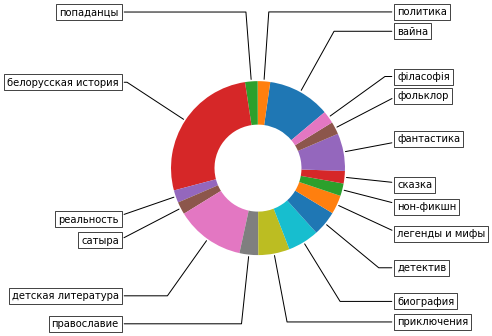

In [22]:
wedges, texts = plt.pie(genres_freq, wedgeprops=dict(width=0.5), startangle=40)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    plt.annotate(genres[i], xy = (x, y), xytext = (1.6 * np.sign(x), 1.8 * y),
                horizontalalignment = horizontalalignment, **kw)

plt.show()

From here we can see two things. First, the donut chart I borrowed from matplotlib documentation is really awesome. Second, belarussian writers surprisingly are not bounded by war and history topics, as one might judge based on the school curriculum. There are also fantasy, satire and adventure books, and they are not as small in numbers as it might seem.

3. Are there any modern writers whose works are studied at school?

In [23]:
df[df['современная литература'] & df['школа']]

,20 век,bookclub minsk,америка,аповесць,беларуская лiтаратура,беларуская мова,беларуская паэзія,белорусская история,библиотека,биография,...,фантастика,флешмоб 2019,флешмоб 2020,флэшмоб 2012,флэшмоб 2017,флэшмоб 2018,фольклор,філасофія,художественная литература,школа
Сяргей Балахонаў,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


I certainly didn't study this guy at school, but ok.

## Conclusion

I've built up a pretty dataset about belarussian writers. With the form it is in now, one can study lots of interesting questions. However, this work doesn't lay claim to be an unbiassed complete reliable research. After all, that's some data taken from one website. I don't recommend using it to make some final conclusions.

The work should be considered as a study project, developed to show the usage of some numpy & pandas & matplotlib resources. And to research some interesting information about Belarus, my country. And to have fun!